In [1]:
from PIL import Image
import numpy as np
import os, shutil

# Making Directories for Working

In [2]:
original_dataset_dir = 'C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images'
base_dir = "D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/working_Malaria_Dataset"
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
train_parasitized_dir = os.path.join(train_dir, 'parasitized')
os.mkdir(train_parasitized_dir)
train_uninfected_dir = os.path.join(train_dir, 'uninfected')
os.mkdir(train_uninfected_dir)
validation_parasitized_dir = os.path.join(validation_dir, 'parasitized') #Directory with 
os.mkdir(validation_parasitized_dir) #validation cat pictures
validation_uninfected_dir = os.path.join(validation_dir, 'uninfected') #Directory with 
os.mkdir(validation_uninfected_dir) #validation dog pictures
test_parasitized_dir = os.path.join(test_dir, 'parasitized')
#Directory with test cat pictures
os.mkdir(test_parasitized_dir)
test_uninfected_dir = os.path.join(test_dir, 'uninfected')
os.mkdir(test_uninfected_dir)

# Checking length of Original Dataset

In [4]:
len(os.listdir("C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images/uninfected"))

13780

# Tranfering data from Original to Working Directory

In [5]:
fnames=os.listdir("C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images/parasitized")
train=fnames[:1000]
validate=fnames[1000:1500]
test=fnames[1500:2000]

In [6]:
original_dataset_dir = 'C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images/parasitized'
fnames = ['{}'.format(i) for i in train]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(train_parasitized_dir, fname) 
    shutil.copyfile(src, dst)


In [8]:
fnames = ['{}'.format(i) for i in validate]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(validation_parasitized_dir, fname) 
    shutil.copyfile(src, dst)

In [10]:
fnames = ['{}'.format(i) for i in test]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(test_parasitized_dir, fname) 
    shutil.copyfile(src, dst)

In [11]:
fnames=os.listdir("C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images/uninfected")
train=fnames[:1000]
validate=fnames[1000:1500]
test=fnames[1500:2000]

In [12]:
original_dataset_dir = 'C:/Users/REHMAN COMPUTER/Desktop/Internship/irfan bhai_work/cell-images-for-detecting-malaria/cell_images/uninfected'
fnames = ['{}'.format(i) for i in train]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(train_uninfected_dir, fname) 
    shutil.copyfile(src, dst)


In [13]:
fnames = ['{}'.format(i) for i in validate]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(validation_uninfected_dir, fname) 
    shutil.copyfile(src, dst)

In [14]:
fnames = ['{}'.format(i) for i in test]
for fname in fnames:#Copies the first 
    src = os.path.join(original_dataset_dir, fname)#000 cat images to train_cats_dir
    dst = os.path.join(test_uninfected_dir, fname) 
    shutil.copyfile(src, dst)

In [15]:
print('total training cat images:', len(os.listdir(train_parasitized_dir)))

print('total training dog images:', len(os.listdir(train_uninfected_dir)))

print('total validation cat images:', len(os.listdir(validation_parasitized_dir)))

print('total validation dog images:', len(os.listdir(validation_uninfected_dir)))

print('total test cat images:', len(os.listdir(test_parasitized_dir)))

print('total test dog images:', len(os.listdir(test_uninfected_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 1000
total test dog images: 500


# Building your network

In [24]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

# Configuring the model for training

In [26]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing

In [27]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape) 
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting the model using a batch generator

In [29]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 69s 692ms/step - loss: 0.6470 - acc: 0.6140 - val_loss: 0.7147 - val_acc: 0.7450
Epoch 2/30
100/100 [==============================] - 70s 703ms/step - loss: 0.5519 - acc: 0.7305 - val_loss: 0.6439 - val_acc: 0.7800
Epoch 3/30
100/100 [==============================] - 69s 686ms/step - loss: 0.5033 - acc: 0.7765 - val_loss: 0.4354 - val_acc: 0.7570
Epoch 4/30
100/100 [==============================] - 67s 671ms/step - loss: 0.4585 - acc: 0.8025 - val_loss: 0.4341 - val_acc: 0.7810
Epoch 5/30
100/100 [==============================] - 67s 671ms/step - loss: 0.4169 - acc: 0.8195 - val_loss: 0.3501 - val_acc: 0.8070
Epoch 6/30
100/100 [==============================] - 64s 643ms/step - loss: 0.3632 - acc: 0.8510 - val_loss: 0.3865 - val_acc: 0.8170
Epoch 7/30
100/100 [==============================] - 64s 640ms/step - loss: 0.3048 - acc: 0.8800 - val_loss: 0.4826 - val_acc: 0.8580
Epoch 8/30
100/100 [==============================] - 6

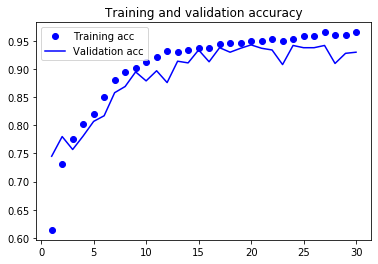

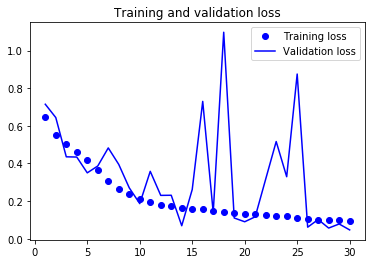

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Using data augmentation
###### Defining a new convnet that includes dropout

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 99s 990ms/step - loss: 0.6931 - acc: 0.5186 - val_loss: 0.6707 - val_acc: 0.5114
Epoch 2/100
100/100 [==============================] - 99s 988ms/step - loss: 0.6285 - acc: 0.6518 - val_loss: 0.6587 - val_acc: 0.7268
Epoch 3/100
100/100 [==============================] - 100s 996ms/step - loss: 0.5754 - acc: 0.7134 - val_loss: 0.4279 - val_acc: 0.7659
Epoch 4/100
100/100 [==============================] - 98s 981ms/step - loss: 0.5362 - acc: 0.7395 - val_loss: 0.4370 - val_acc: 0.7726
Epoch 5/100
100/100 [==============================] - 99s 993ms/step - loss: 0.5035 - acc: 0.7714 - val_loss: 0.6392 - val_acc: 0.6948
Epoch 6/100
100/100 [==============================] - 101s 1s/step - loss: 0.4660 - acc: 0.8008 - val_loss: 0.5501 - val_acc: 0.7584
Epoch 7/100
100/100 [==============================] - 101s 1s/step - loss: 0.4239 - acc: 0.8392 - val_loss: 0.3198 - val_acc: 0.8154
Epoch 8/100
100/100 [==============================

100/100 [==============================] - 97s 973ms/step - loss: 0.1916 - acc: 0.9309 - val_loss: 0.0625 - val_acc: 0.9098
Epoch 62/100
100/100 [==============================] - 100s 998ms/step - loss: 0.2011 - acc: 0.9309 - val_loss: 0.1231 - val_acc: 0.9004
Epoch 63/100
100/100 [==============================] - 105s 1s/step - loss: 0.1873 - acc: 0.9331 - val_loss: 0.9750 - val_acc: 0.8988
Epoch 64/100
100/100 [==============================] - 105s 1s/step - loss: 0.1879 - acc: 0.9369 - val_loss: 0.0560 - val_acc: 0.9117
Epoch 65/100
100/100 [==============================] - 105s 1s/step - loss: 0.1973 - acc: 0.9309 - val_loss: 0.2470 - val_acc: 0.9169
Epoch 66/100
100/100 [==============================] - 104s 1s/step - loss: 0.1843 - acc: 0.9353 - val_loss: 0.4634 - val_acc: 0.8892
Epoch 67/100
100/100 [==============================] - 100s 998ms/step - loss: 0.1990 - acc: 0.9296 - val_loss: 1.4664 - val_acc: 0.9258
Epoch 68/100
100/100 [==============================] - 100s

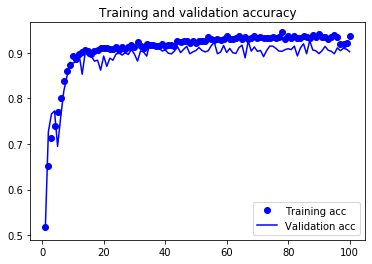

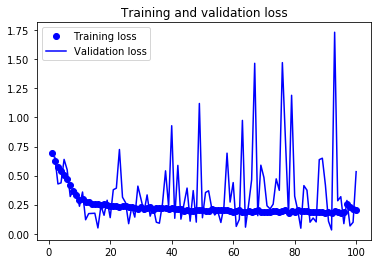

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [37]:
model.save("Malaria_detection.h5")